In [68]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


## Reading the Image

In [117]:
# test_img_path = './leaf_linkoping_UNI/Remove-bg.ai_1717884272975.png'
# test_img_path = './leaf_linkoping_UNI/Leaves/1001.jpg'
# test_img_path = './remove/15. Populus alba/iPAD2_C15_EX03.JPG'
test_img_path = './leaf_linkoping_UNI/Leaves/2522.jpg'

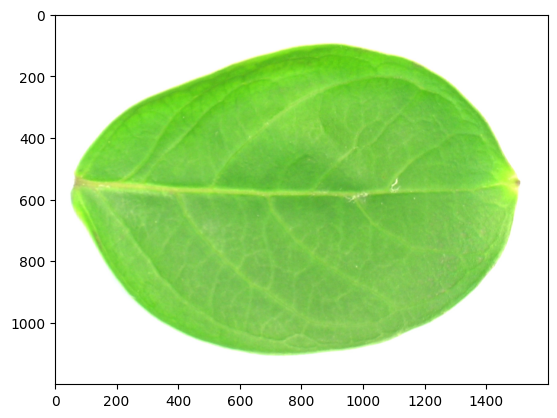

In [118]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Pre  Image processing

#### Converting image to grayscale

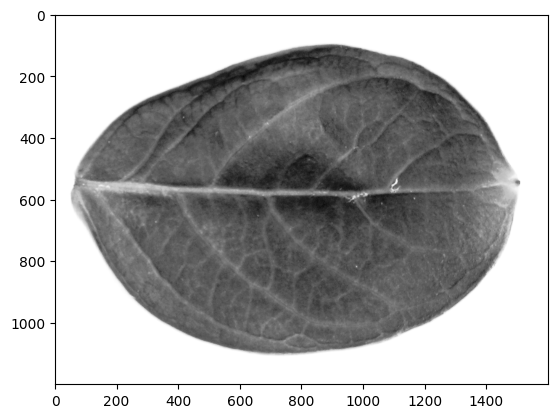

In [119]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [120]:

gs.shape

(1200, 1600)

#### Smoothing image using Guassian filter of size (25,25)

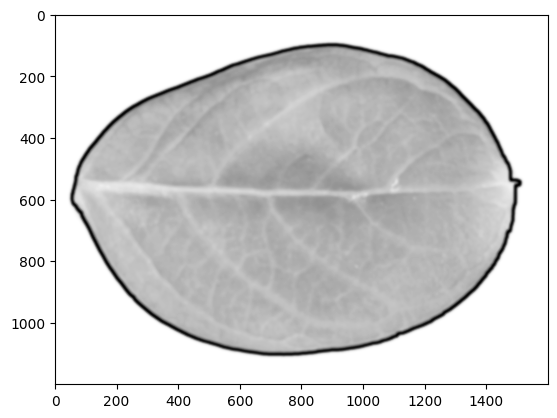

In [135]:

blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

#### Adaptive image thresholding using Otsu's thresholding method

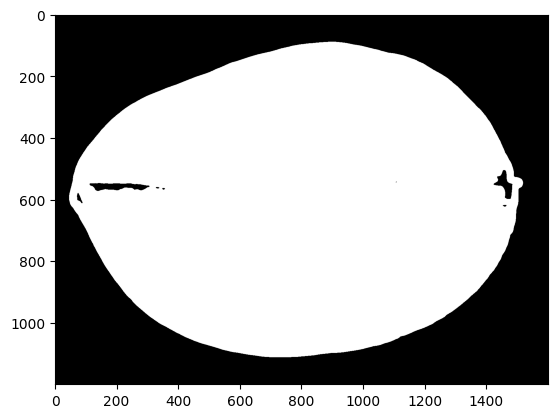

In [136]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

#### Closing of holes using Morphological Transformation

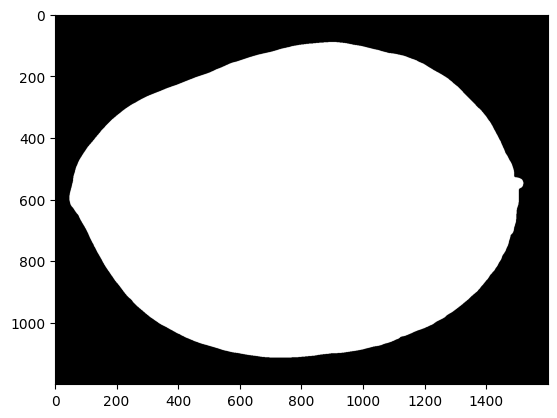

In [137]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing,cmap='Greys_r')

## Boundary extraction

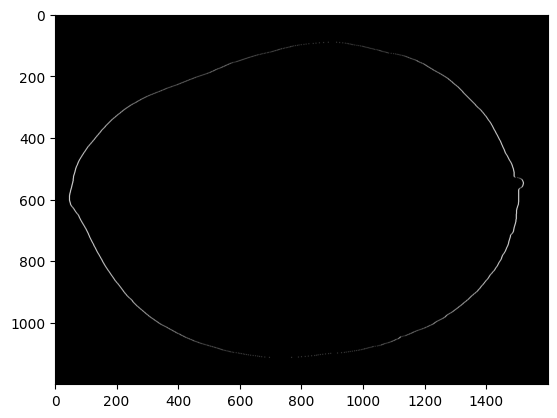

In [138]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

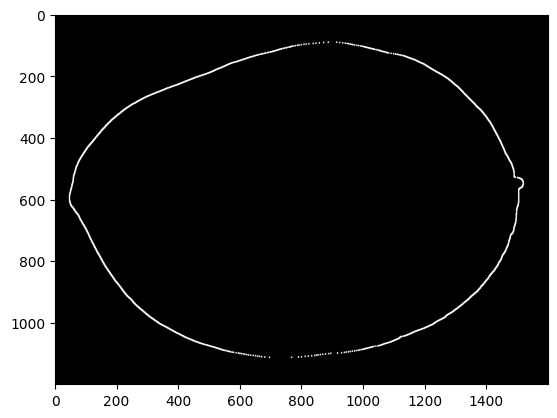

In [139]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

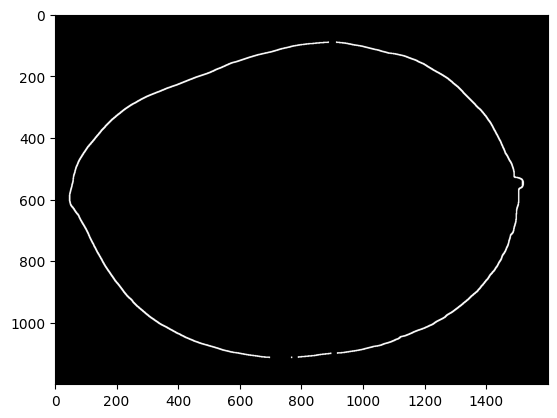

In [140]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

#### Boundary extraction using contours - Effective

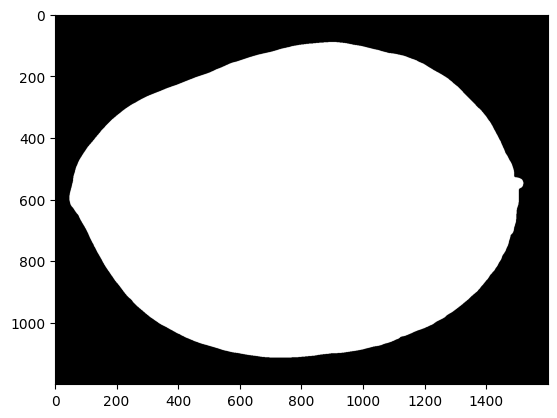

In [141]:

plt.imshow(closing,cmap="Greys_r")

In [142]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [143]:

len(contours)

1

In [144]:
cnt = contours[0]
len(cnt)

1854

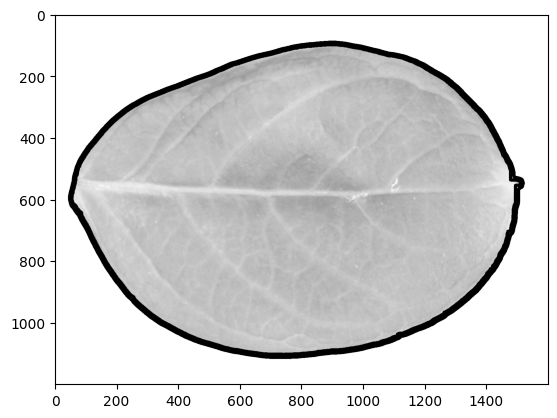

In [145]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

## Morphological processing

#### 1. Shape based features
Calculating moments using contours

In [146]:
M = cv2.moments(cnt)
M

{'m00': 1126772.0,
 'm10': 896474861.5,
 'm01': 684133925.6666666,
 'm20': 857156724035.5,
 'm11': 540691817069.6666,
 'm02': 486736357839.0,
 'm30': 908829080055507.6,
 'm21': 514133471349844.5,
 'm12': 383846361159496.7,
 'm03': 382328434756760.3,
 'mu20': 143909343641.37927,
 'mu11': -3614277028.763489,
 'mu02': 71355758881.90472,
 'mu30': -2128658761610.125,
 'mu21': -548982179724.4375,
 'mu12': 981318438819.9922,
 'mu03': 151165407953.5625,
 'nu20': 0.11334879296035558,
 'nu11': -0.00284675010161665,
 'nu02': 0.056202668536863835,
 'nu30': -0.0015794865455385264,
 'nu21': -0.0004073503852535186,
 'nu12': 0.0007281483058527613,
 'nu03': 0.00011216627686858216}

### Area
calculating area


In [147]:
print(f'File: {test_img_path}')
area = cv2.contourArea(cnt)
area
x, y, w, h = cv2.boundingRect(cnt)
# Tính diện tích của hình chữ nhật bao quanh
bounding_rect_area = w * h
# Tính Extent
extent = area / bounding_rect_area
print(f'Object Area: {area}')
print(f'Bounding Rectangle Area: {bounding_rect_area}')
print(f'Extent: {extent}')
perimeter = cv2.arcLength(cnt,True)
print(f'Perimeter: {perimeter}')
# "Solidity" là tỷ lệ của diện tích của đường viền đến diện tích của lồi lõm.
hull = cv2.convexHull (cnt)
convex_hull_area = cv2.contourArea(hull)
solidity = area / convex_hull_area
print(f'Solidity of contour : {solidity}')
# equivalent_diameter
equivalent_diameter = np.sqrt(area * 4 / np.pi)
print(f'Equivalent Diameter of contour : {equivalent_diameter}')

File: ./leaf_linkoping_UNI/Leaves/2522.jpg
Object Area: 1126772.0
Bounding Rectangle Area: 1506879
Extent: 0.7477521420100751
Perimeter: 4123.379184961319
Solidity of contour : 0.9961335654873754


### Perimeter


In [63]:
perimeter = cv2.arcLength(cnt,True)
perimeter

4072.3253581523895

### Fitting in the best-fit rectangle and ellipse
The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

C:\Users\toygu\AppData\Local\Temp\ipykernel_22888\2719757872.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


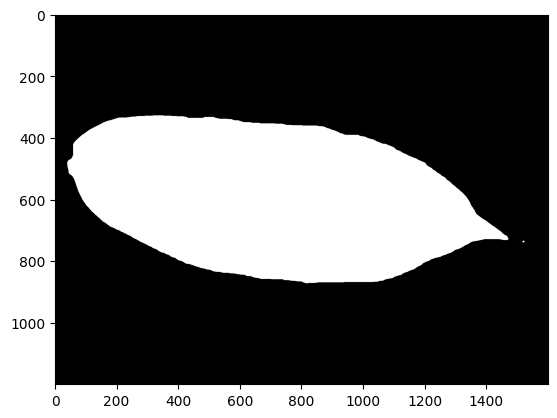

In [46]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

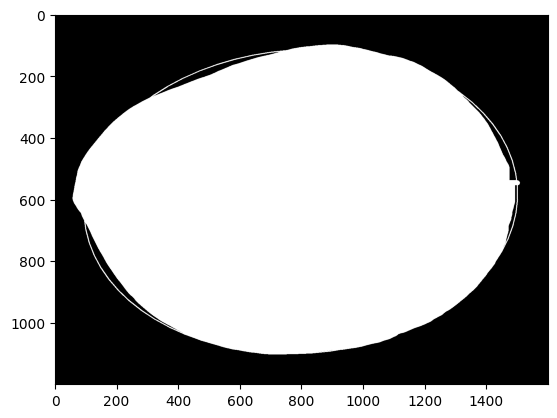

In [66]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

### Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [48]:
### Ratio
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.3333333333333333

In [49]:
# Rectagularity
rectangularity = w*h/area
rectangularity

2.6666666666666665

In [50]:
# Circularity
circularity = ((perimeter)**2)/area
circularity

15.09802762221398

In [51]:
#equi_diameter 
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

2.393653682408596

In [59]:
#fit Ellipse
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

## (Maybe) 
### Texture based features
Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [61]:
import mahotas as mt

ModuleNotFoundError: No module named 'mahotas'

In [ ]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

In [ ]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy